<h2>Desafio 3 - Machine Learning</h2>

<h4>Objetivo</h4>
Construir un modelo de clasificación (Aprendizaje supervisado> clasificación) a partir de un dataset seleccionado.

<h3>Grupo 7</h3>
<ul>
    <li>Ignacio Mendieta</li>
    <li>Laura Jazmín Chao</li>
    <li>Juan Nicolás Capistrano</li>
    <li>Betiana Srur</li>
    <li>Marecelo Carrizo</li>
    
</ul>
<h3>Gráficos

<a id="section_toc"></a> 
<h2> Tabla de Contenidos </h2>

[Librerías](#section_import)

[Dataset completo](#section_dataset_complete)

[Limpieza de columnas de género](#section_genre_clean)

[Binarización de etiquetas múltiples](#section_binarizer)

[Histograma: cantidad de películas por género](#section_histogram_1)   

[Distribución de países](#section_countries)

[Distribución de lenguas](#section_languages)


<a id="section_import"></a> 
<h3>Librerías</h3>

[volver a TOC](#section_toc)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100) # Para mostrar todas las columnas
# pd.set_option('display.max_rows', 100) # Para mostrar todas las filas

<a id="section_dataset_complete"></a> 
<h3>Dataset completo</h3>

[volver a TOC](#section_toc)

In [3]:
data = pd.read_csv("Data/IMDB movies.csv", low_memory=False)
data.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [4]:
data.drop(['year', 'date_published','duration', 'director', 'writer',
              'production_company', 'actors','avg_vote', 'votes', 'budget', 'usa_gross_income',
              'worlwide_gross_income', 'metascore', 'imdb_title_id', 'original_title',
              'reviews_from_users', 'reviews_from_critics'], axis=1,inplace=True)

In [5]:
data.head()

,title,genre,country,language,description
0,Miss Jerry,Romance,USA,None,The adventures of a female reporter in the 1890s.
1,The Story of the Kelly Gang,"Biography, Crime, Drama",Australia,None,True story of notorious Australian outlaw Ned ...
2,Den sorte drøm,Drama,"Germany, Denmark",NaN,Two men of high rank are both wooing the beaut...
3,Cleopatra,"Drama, History",USA,English,The fabled queen of Egypt's affair with Roman ...
4,L'Inferno,"Adventure, Drama, Fantasy",Italy,Italian,Loosely adapted from Dante's Divine Comedy and...


<a id="section_genre_clean"></a> 
<h3>Limpieza de columnas de género</h3>

[volver a TOC](#section_toc)

In [6]:
import unidecode
import re

def clean_text(t):
    t_lower_no_accents=unidecode.unidecode(t.lower()); # sacamos acentos y llevamos a minuscula
    t_lower_no_accents_no_punkt=re.sub(r'([^\s\w]|_)+','',t_lower_no_accents); # quitamos signos de puntuacion usando una regex que reemplaza todo lo q no sean espacios o palabras por un string vacio
    return t_lower_no_accents_no_punkt

In [7]:
data['genre_clean'] = data['genre'].apply(clean_text)

In [8]:
genres = pd.unique(data['genre_clean'].str.split(expand=True).stack())
genres

array(['romance', 'biography', 'crime', 'drama', 'history', 'adventure',
       'fantasy', 'war', 'mystery', 'horror', 'western', 'comedy',
       'family', 'action', 'scifi', 'thriller', 'sport', 'animation',
       'musical', 'music', 'filmnoir', 'adult', 'documentary',
       'realitytv', 'news'], dtype=object)

In [9]:
data['genre_list'] = data['genre_clean'].str.split(" ")

In [10]:
data['genre_unique'] = data['genre_clean'].str.split(" ").map(lambda x: x[0])

In [11]:
data.head(3)

,title,genre,country,language,description,genre_clean,genre_list,genre_unique
0,Miss Jerry,Romance,USA,None,The adventures of a female reporter in the 1890s.,romance,[romance],romance
1,The Story of the Kelly Gang,"Biography, Crime, Drama",Australia,None,True story of notorious Australian outlaw Ned ...,biography crime drama,"[biography, crime, drama]",biography
2,Den sorte drøm,Drama,"Germany, Denmark",NaN,Two men of high rank are both wooing the beaut...,drama,[drama],drama


In [12]:
data['genre_unique'].value_counts()

drama          25386
comedy         24297
action         12182
crime           5557
horror          5113
adventure       3599
animation       2108
biography       2067
thriller        1375
romance          767
family           638
western          617
mystery          593
fantasy          502
scifi            417
musical          324
war              107
history           80
music             77
filmnoir          29
sport             16
adult              2
documentary        2
Name: genre_unique, dtype: int64

In [13]:
columns_to_drop = ['documentary', 'realitytv', 'news', 'adult' ]

indexes_to_drop = []

for genre in columns_to_drop:
    genre = data['genre_clean'].apply(lambda x: genre in str(x).lower());
    movies_index = list(genre[genre].index)
    for index in movies_index:
        indexes_to_drop.append(index)

In [14]:
# #Drop de filas donde hay movies de las 4 ultimas categorias
data.drop(index=indexes_to_drop, inplace=True)

<a id="section_binarizer"></a> 
<h3>Binarización de multietiquetas</h3>

[volver a TOC](#section_toc)

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer

In [16]:
binarizer = MultiLabelBinarizer(classes=genres)
binarizer.fit(data['genre_list'])
genre_encoded = binarizer.transform(data['genre_list'])


In [17]:
genre_enc = pd.DataFrame(genre_encoded, columns = binarizer.classes_, index = data.index)

In [18]:
genre_enc.head(5)

,romance,biography,crime,drama,history,adventure,fantasy,war,mystery,horror,western,comedy,family,action,scifi,thriller,sport,animation,musical,music,filmnoir,adult,documentary,realitytv,news
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id="section_histogram_1"></a> 
<h3>Histograma: cantidad de películas por género</h3>

[volver a TOC](#section_toc)

In [19]:
counts = []
for genre in genre_enc.columns:
    counts.append((genre, genre_enc[genre].sum()))
df_stats = pd.DataFrame(counts, columns=['genre', 'number of movies'])
df_stats

,genre,number of movies
0,romance,14127
1,biography,2376
2,crime,11066
3,drama,47108
4,history,2296
5,adventure,7590
6,fantasy,3812
7,war,2241
8,mystery,5225
9,horror,9554


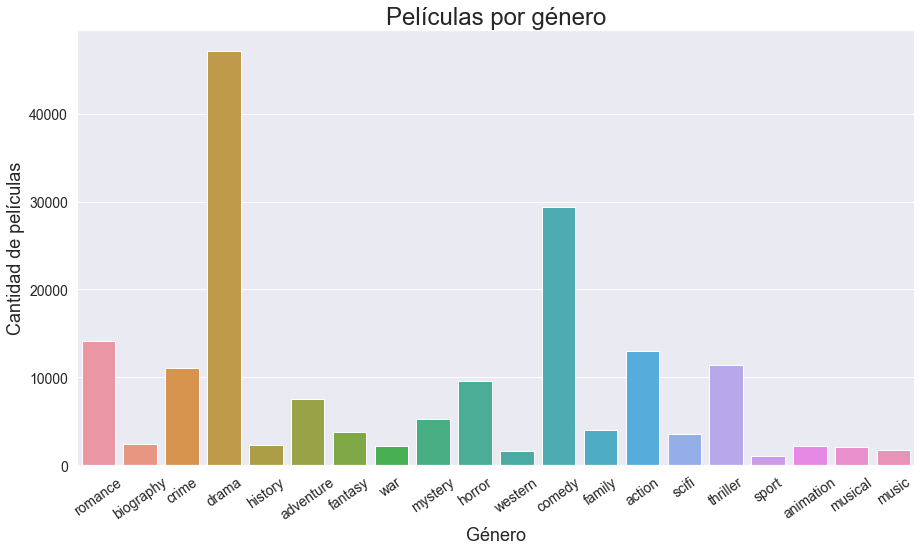

In [20]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(df_stats['genre'][:20], df_stats['number of movies'])

plt.title("Películas por género", fontsize=24)
plt.ylabel('Cantidad de películas', fontsize=18)
plt.xlabel('Género', fontsize=18)
plt.xticks(rotation=35, fontsize=14)
plt.yticks(fontsize=14)

# #adding the text labels
# rects = ax.patches
# labels = data.iloc[:,2:].sum().values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [21]:
# plt.savefig('Histograma1.png')

#### Películas con más de un género

In [25]:
rowSums = genre_enc.sum(axis=1)
rowSums

0        1
1        3
2        1
3        2
4        3
        ..
85850    1
85851    2
85852    1
85853    2
85854    1
Length: 85847, dtype: int64

In [26]:
multiLabel_counts = rowSums.value_counts()
multiLabel_counts

3    31225
2    27548
1    27074
dtype: int64

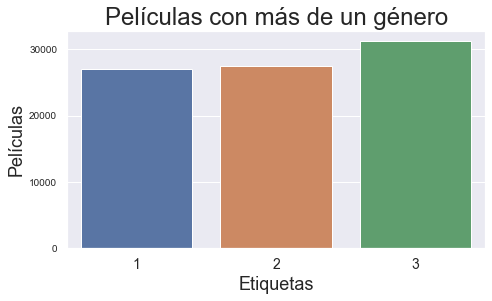

In [53]:

#Sirve para el dataset total (hacer gráfico para poner en la ppt)

sns.set(font_scale = 2)
plt.figure(figsize=(7.5,4))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Películas con más de un género")
plt.ylabel('Películas', fontsize=18)
plt.xlabel('Etiquetas', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

<a id="section_countries"></a> 
<h3>Distribución de países</h3>

[volver a TOC](#section_toc)

In [36]:
countries = data['country'].value_counts()

In [37]:
top_10_countries = countries[:10]
top_10_countries

USA          28508
India         6065
UK            4111
Japan         3077
France        3055
Italy         2444
Canada        1802
Germany       1396
Turkey        1351
Hong Kong     1239
Name: country, dtype: int64

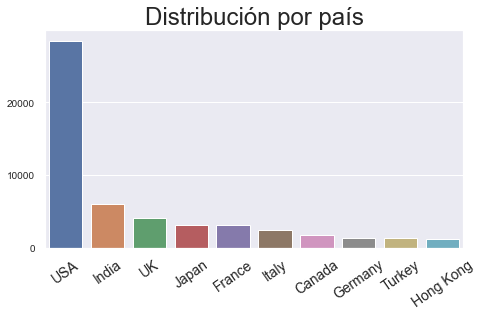

In [48]:
sns.set(font_scale = 2)
plt.figure(figsize=(7.5,4))

ax = sns.barplot(top_10_countries.index, top_10_countries.values)

plt.title("Distribución por país")
# plt.ylabel('Number of movies', fontsize=18)
# plt.xlabel('Number of labels', fontsize=18)
plt.xticks(rotation=35, fontsize=14)
plt.yticks(fontsize=10)
plt.show()

<a id="section_languages"></a> 
<h3>Distribución de lenguas</h3>

[volver a TOC](#section_toc)


In [43]:
languages = data['language'].value_counts()
top_10_languages = languages[:10]
top_10_languages

English             35934
French               3902
Spanish              2830
Japanese             2826
Italian              2731
Hindi                2106
German               1761
Turkish              1355
Russian              1345
English, Spanish     1108
Name: language, dtype: int64

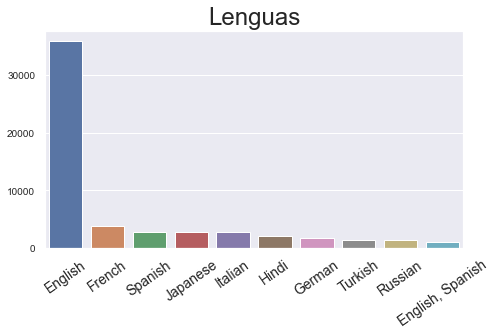

In [49]:
sns.set(font_scale = 2)
plt.figure(figsize=(7.5,4))

ax = sns.barplot(top_10_languages.index, top_10_languages.values)

plt.title("Lenguas")
# plt.ylabel('Number of movies', fontsize=18)
# plt.xlabel('Number of labels', fontsize=18)
plt.xticks(rotation=35, fontsize=14)
plt.yticks(fontsize=10)
plt.show()